Heart disease Prediction using Desicion Tree

Reading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,high,normal,150,no,2.3,0,0,fixed deffect,1
1,37,Male,non anginal pain,130,250,normal,S-T abnormanilty,187,no,3.5,0,0,reversible deffect,1
2,41,Female,atypical angina,130,204,normal,normal,172,no,1.4,2,0,reversible deffect,1
3,56,Male,atypical angina,120,236,normal,S-T abnormanilty,178,no,0.8,2,0,reversible deffect,1
4,57,Female,typical angina,120,354,normal,S-T abnormanilty,163,yes,0.6,2,0,reversible deffect,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 33.3+ KB


In [5]:
df.shape

(303, 14)

In [6]:
# checking missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# checking duplicated data
df.duplicated().sum()

1

Exploratory Data Analysis

In [8]:
# seperate cat and con data 
cat=list(df.columns[df.dtypes=="object"])
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [9]:
con=list(df.columns[df.dtypes!="object"])
con

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target']

Univariate Analysis
categorical-countplot
numerical-histogram

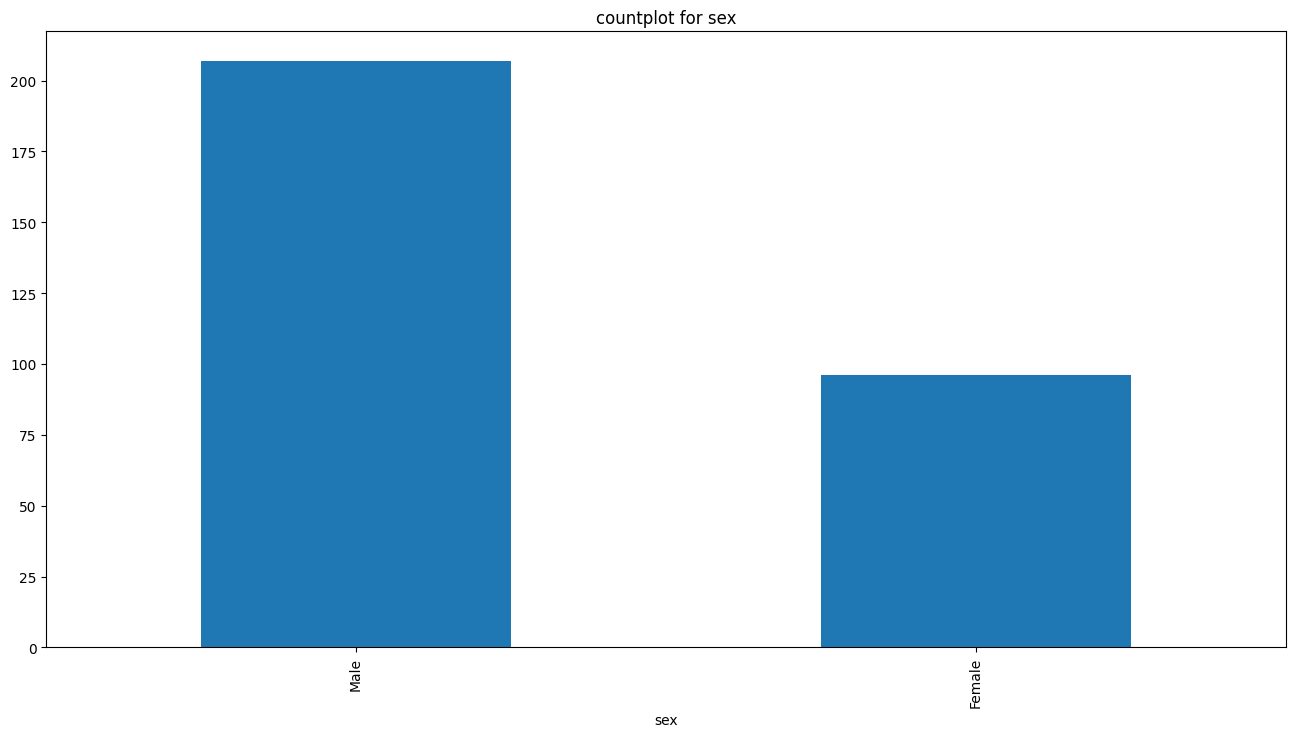

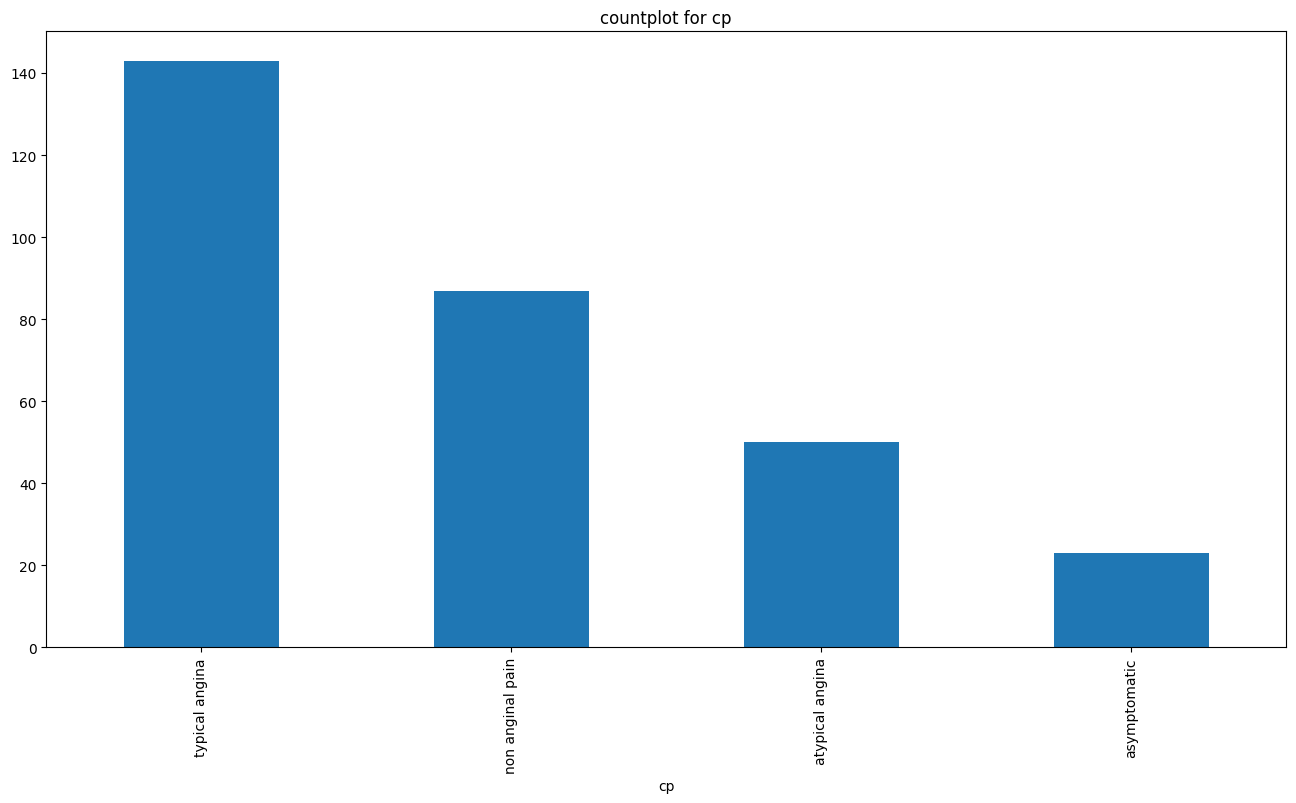

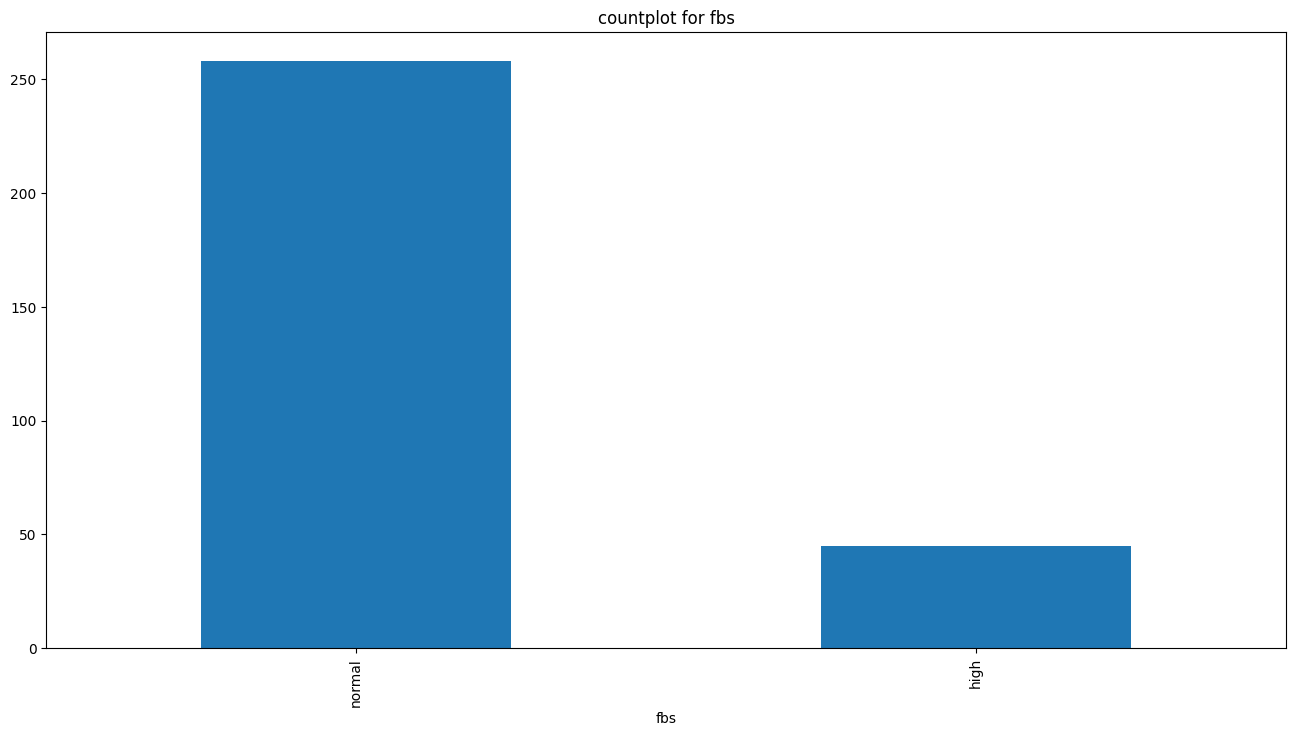

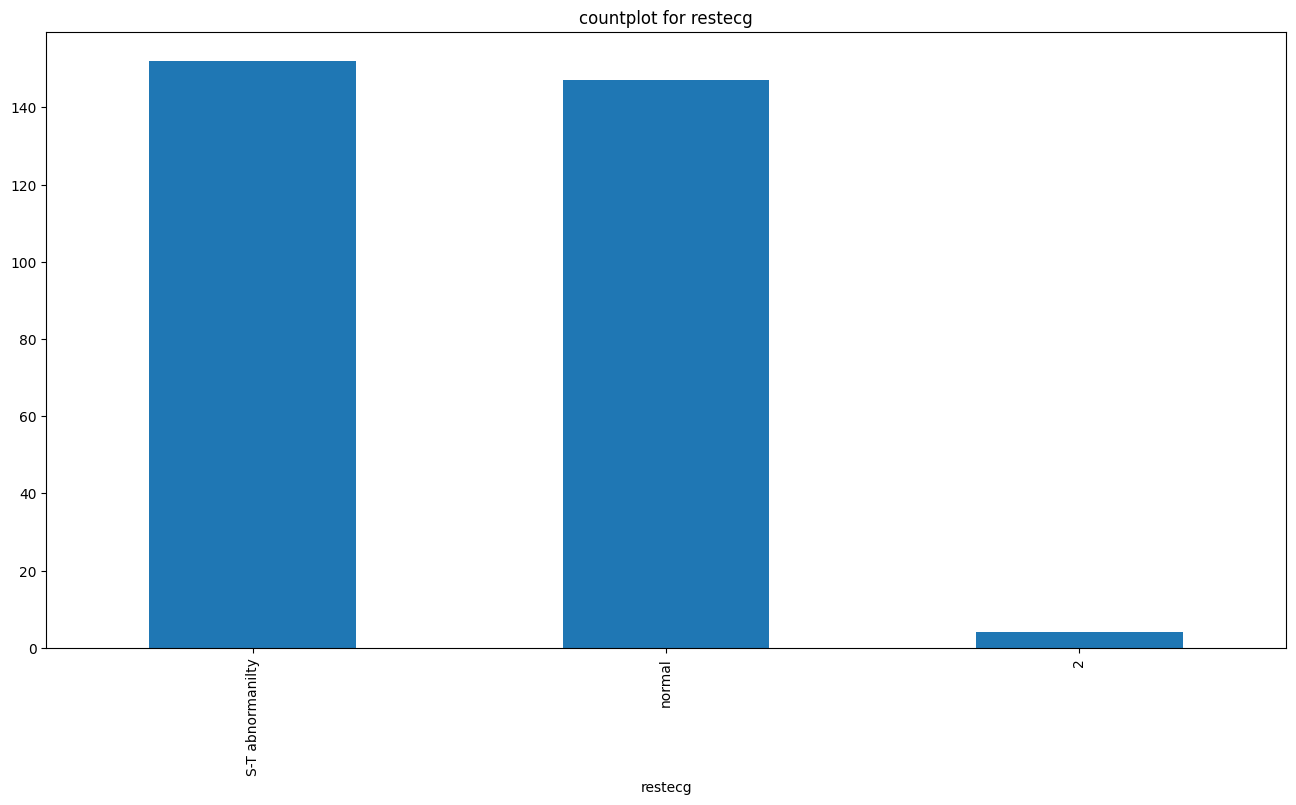

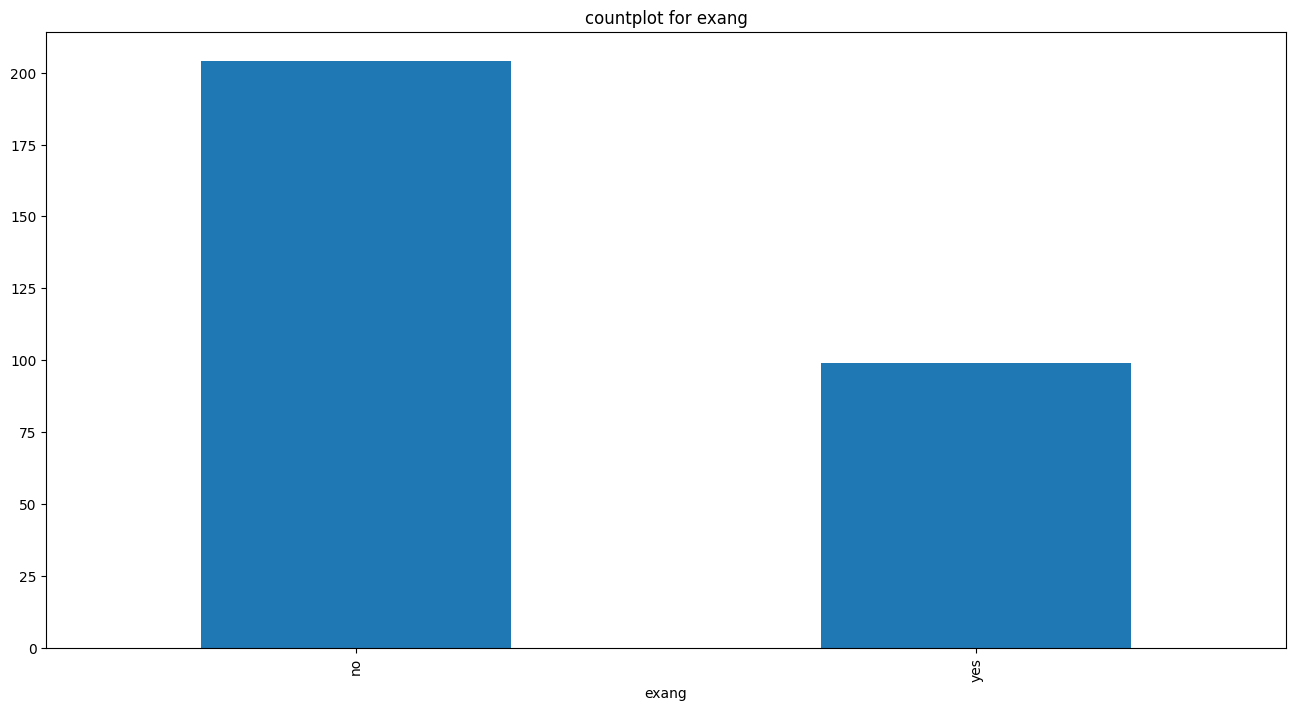

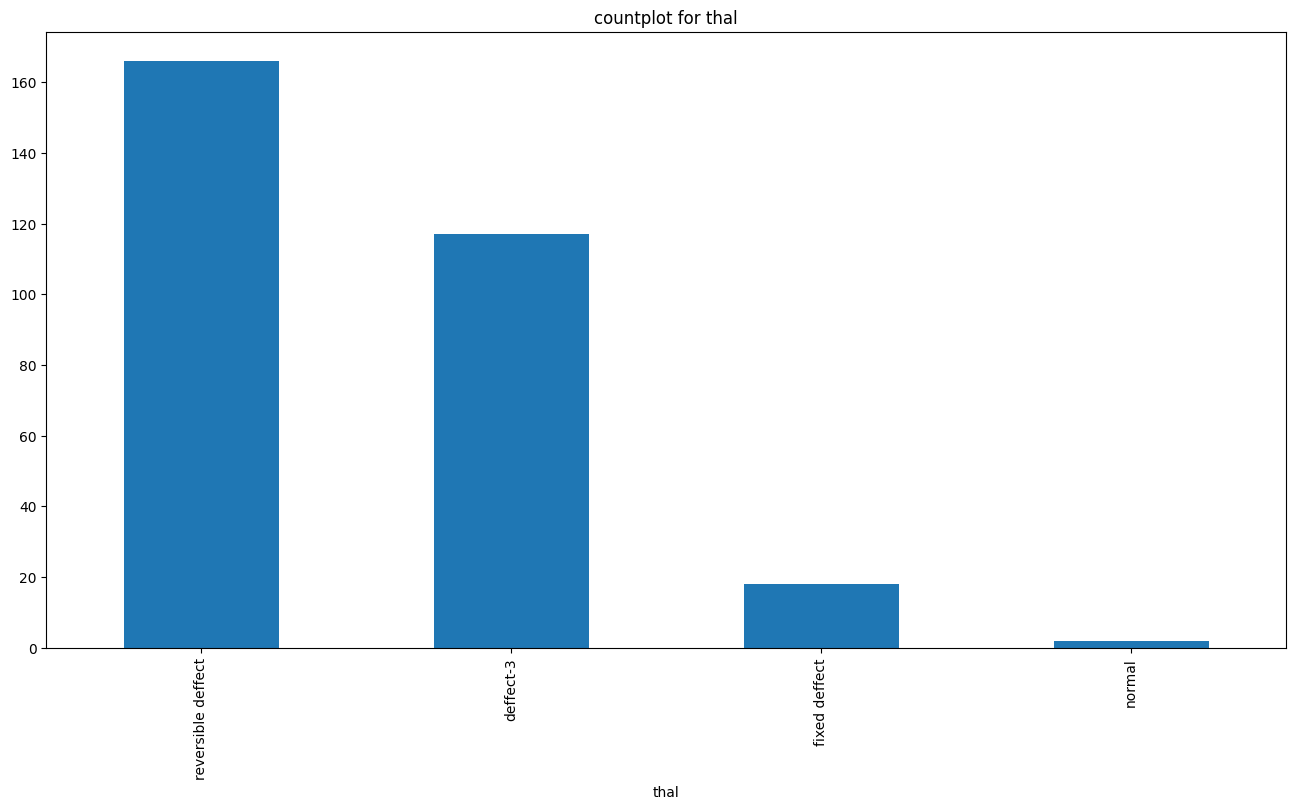

In [10]:
for i in cat:
    plt.figure(figsize=(16,8))
    plt.title(f"countplot for {i}")
    df[i].value_counts().plot(kind="bar")
    plt.show()

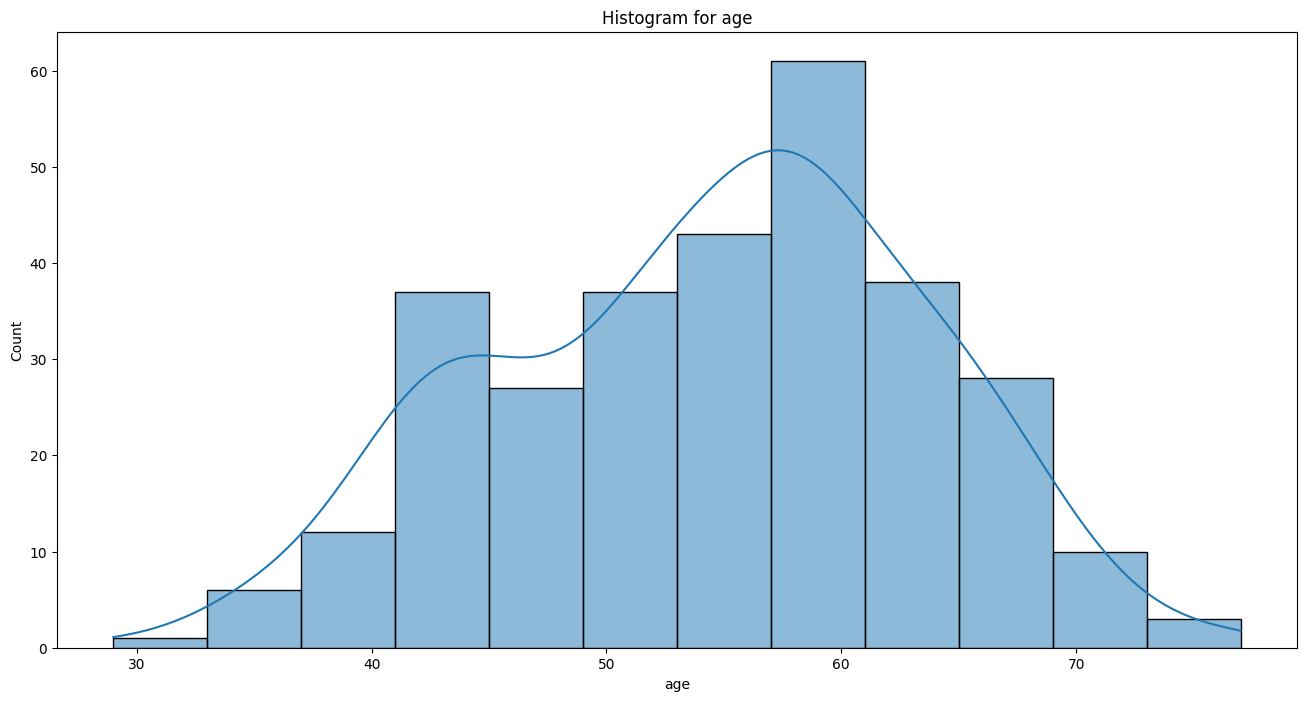

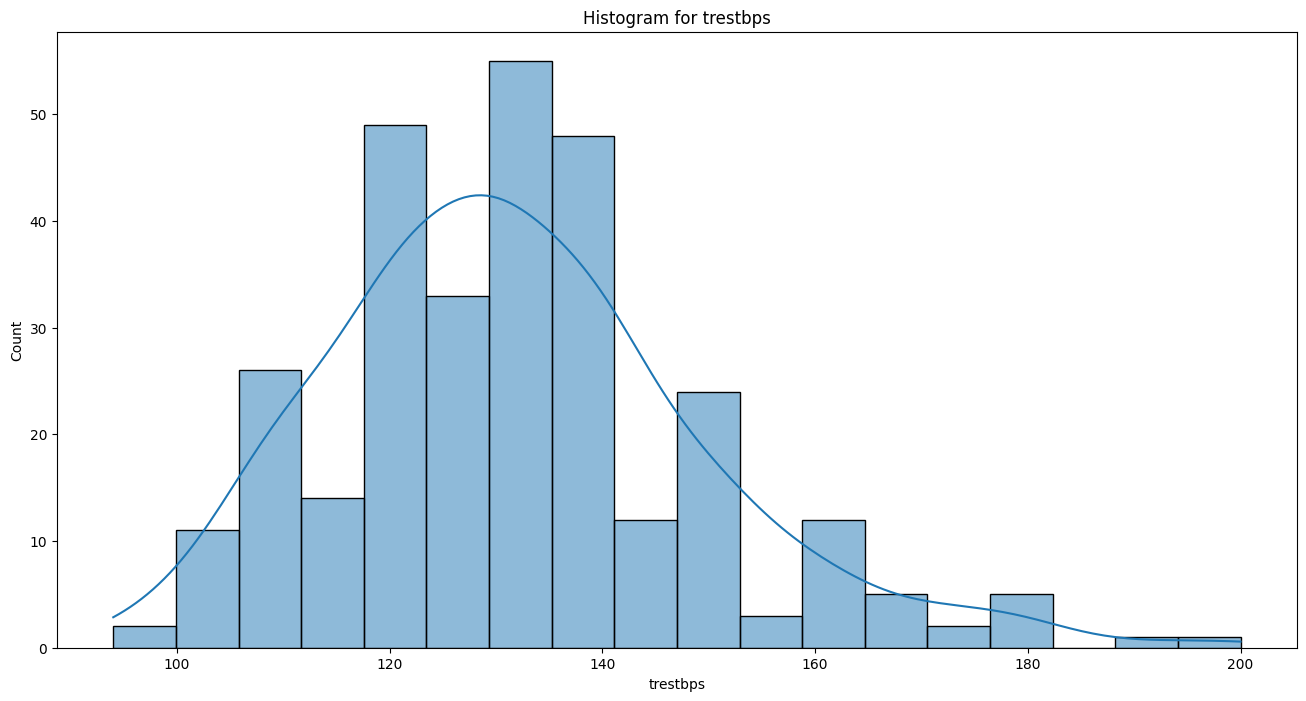

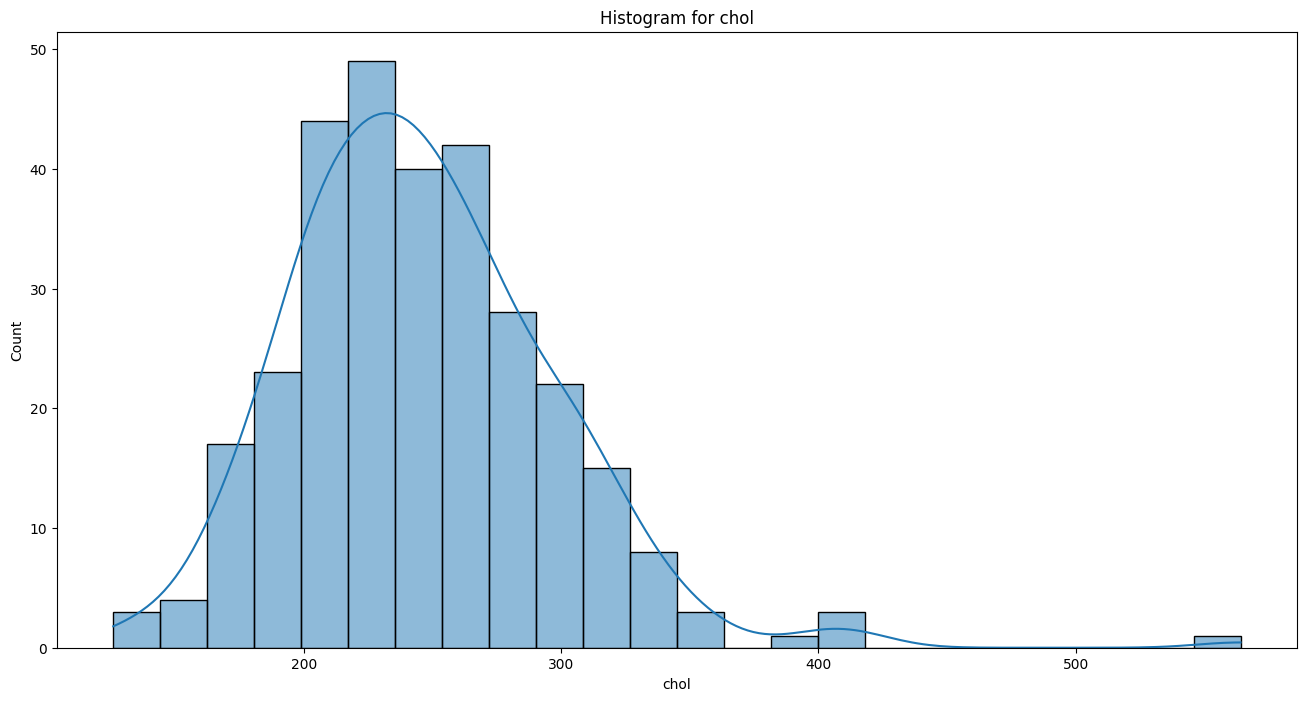

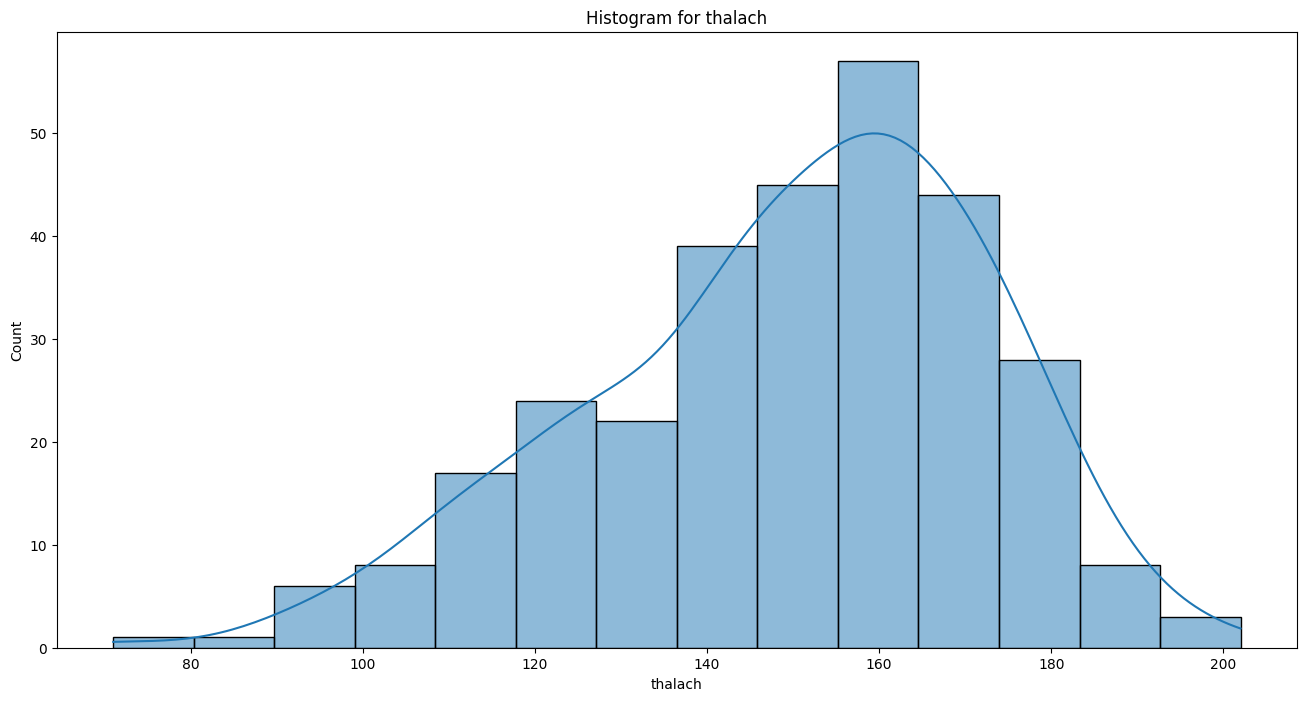

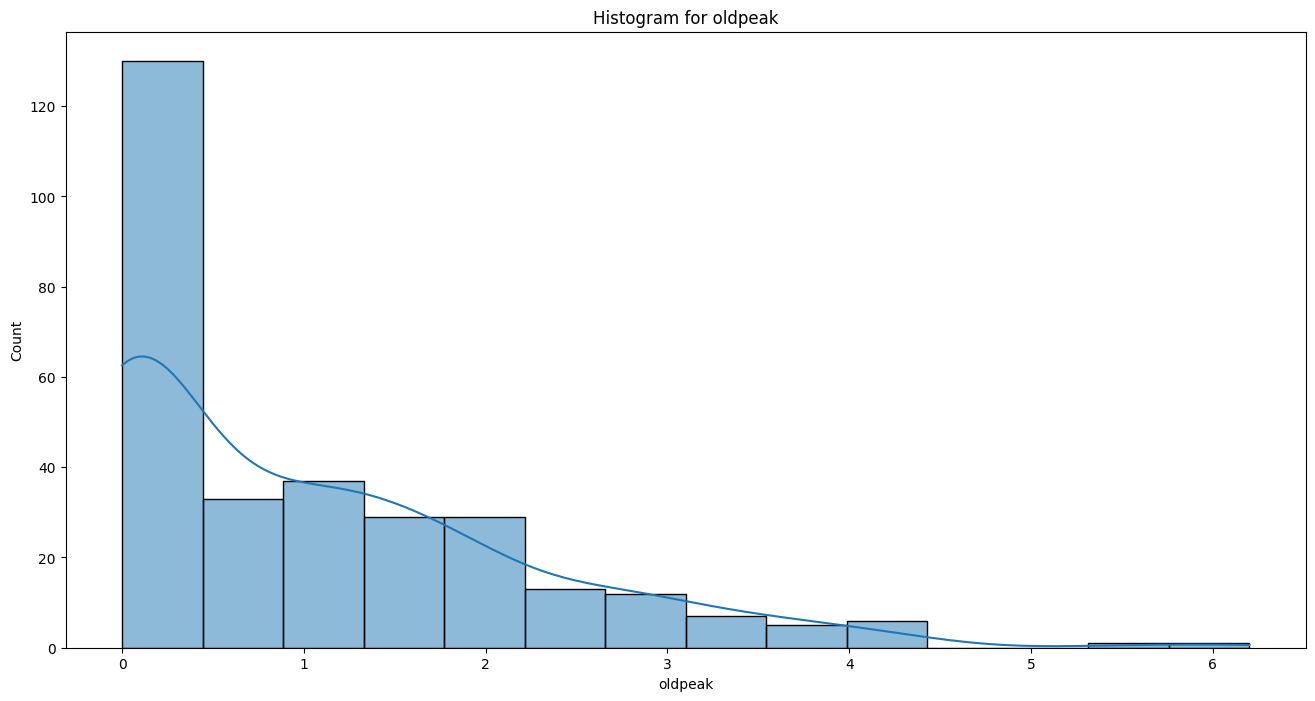

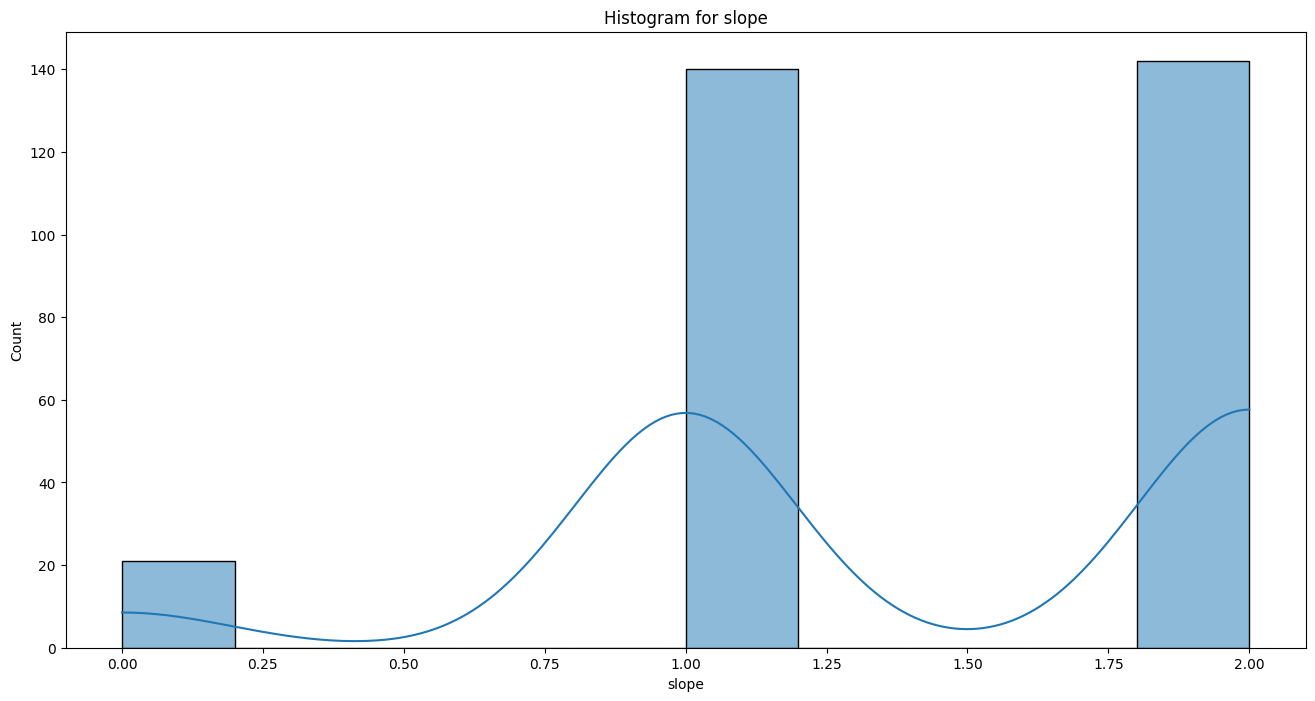

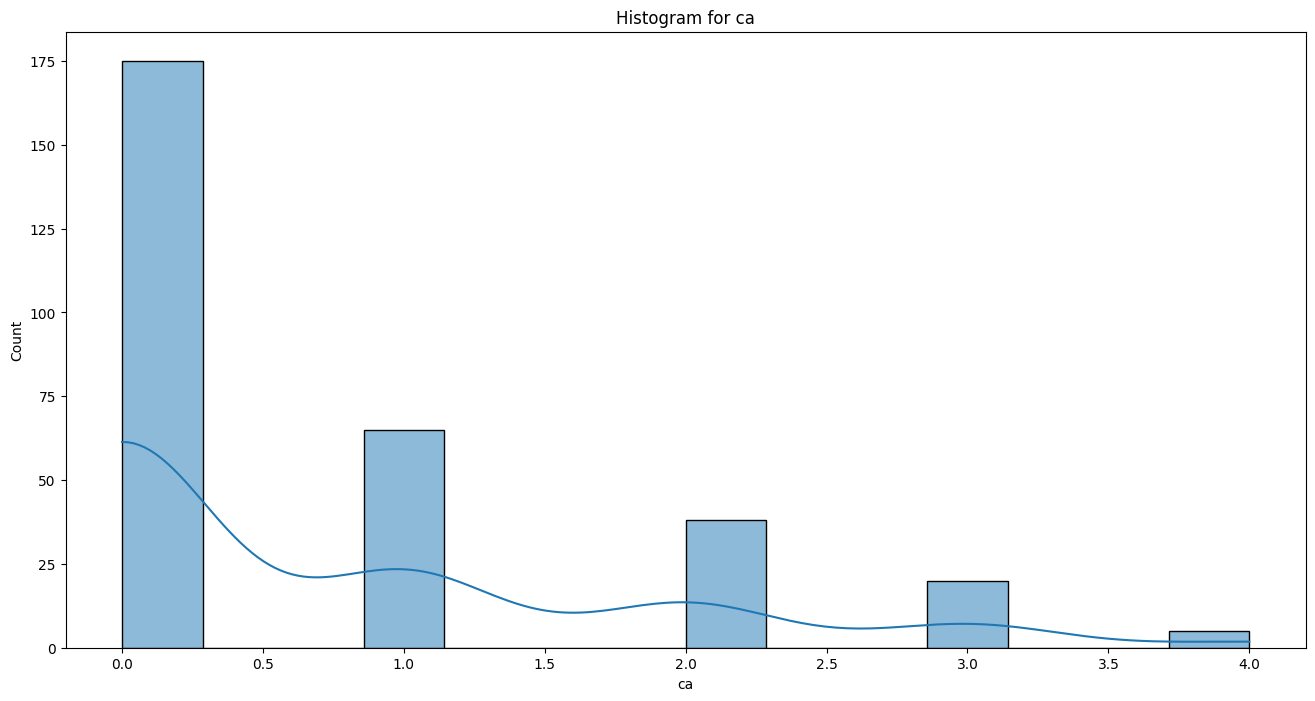

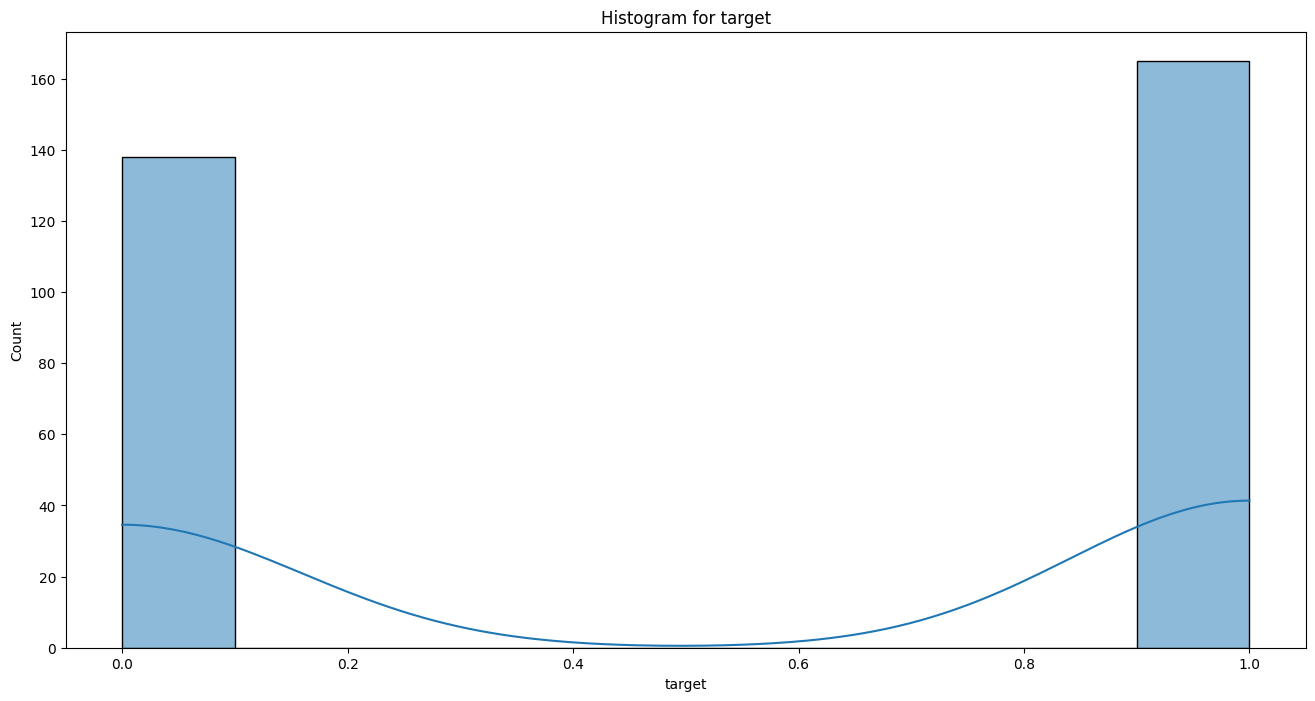

In [11]:
for i in con:
    plt.figure(figsize=(16,8))
    plt.title(f"Histogram for {i}")
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

Bivariate Analysis

In [12]:
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [13]:
con

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target']

<Axes: title={'center': 'Boxplot for sex and age'}, xlabel='sex', ylabel='age'>

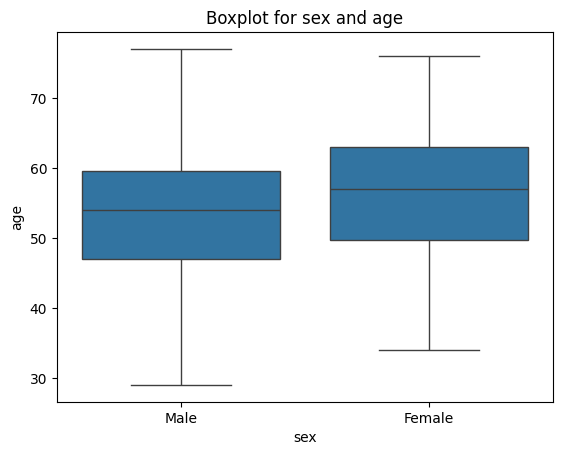

In [14]:
# cat vs con
plt.title("Boxplot for sex and age")
sns.boxplot(data=df,x="sex",y="age")

Multivariate Analysis

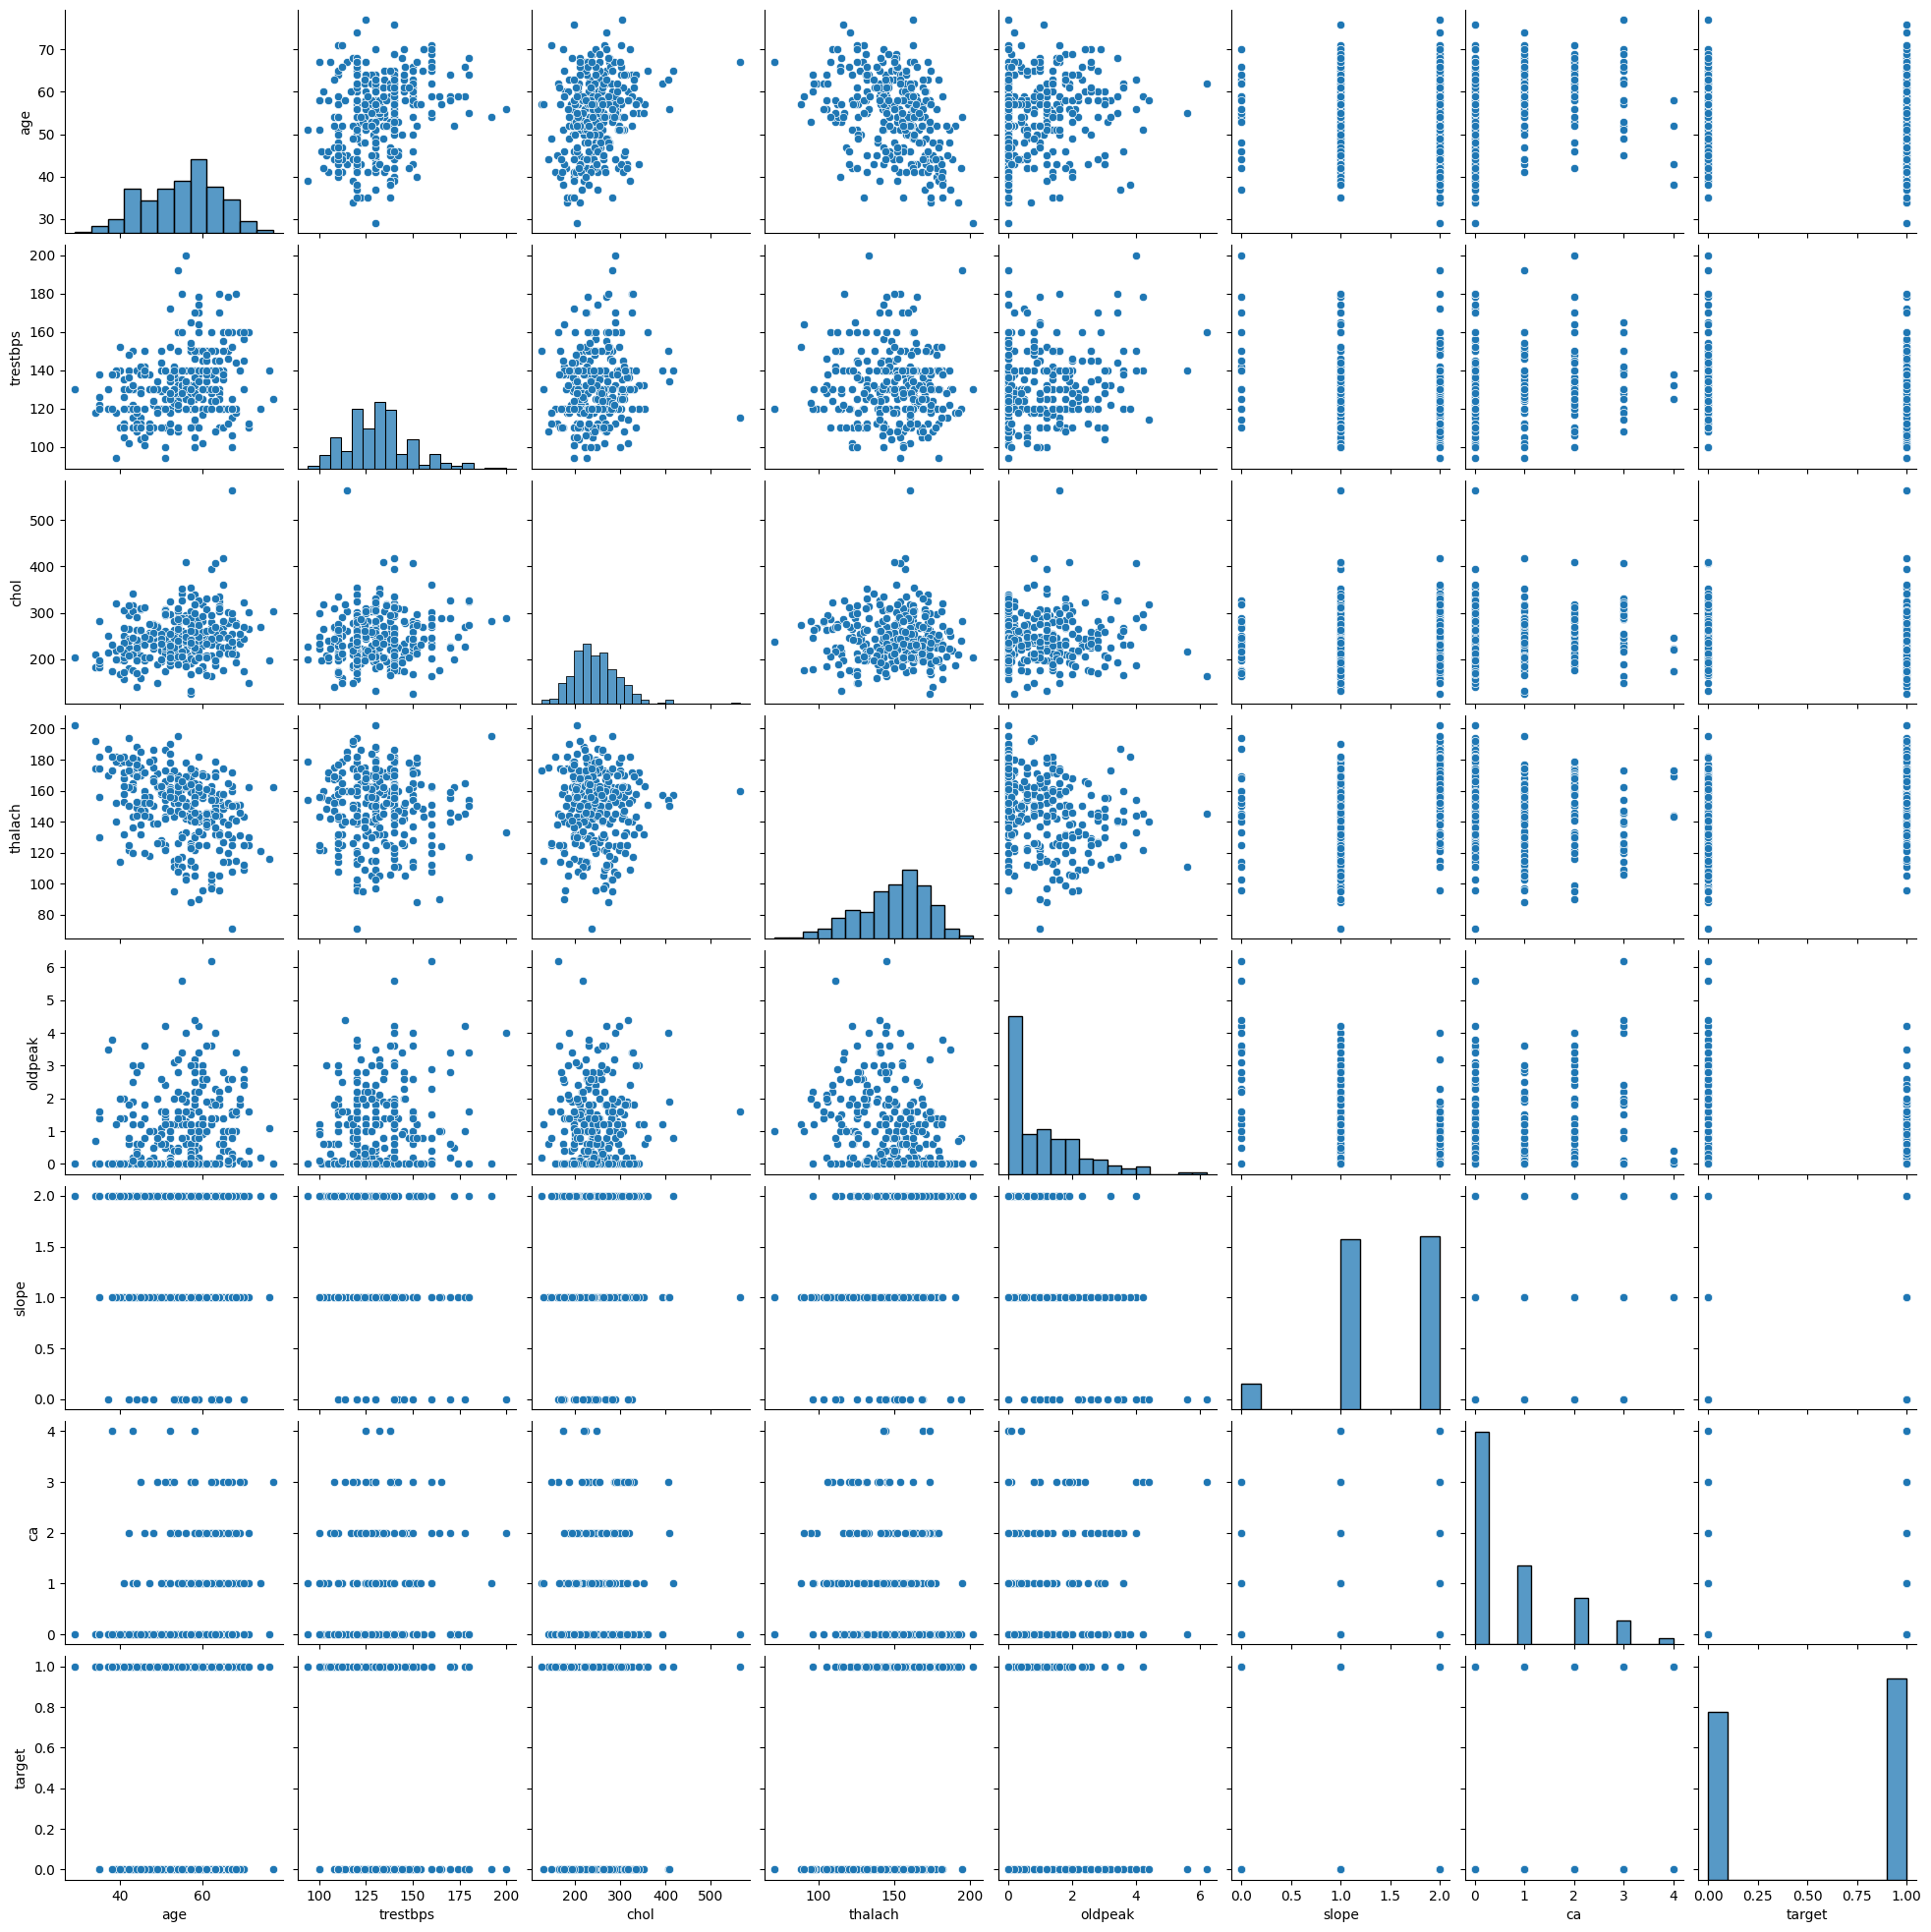

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
ctab1 = pd.crosstab(df['sex'], df['fbs'])
ctab1

fbs,high,normal
sex,,
Female,12,84
Male,33,174


<Axes: xlabel='fbs', ylabel='sex'>

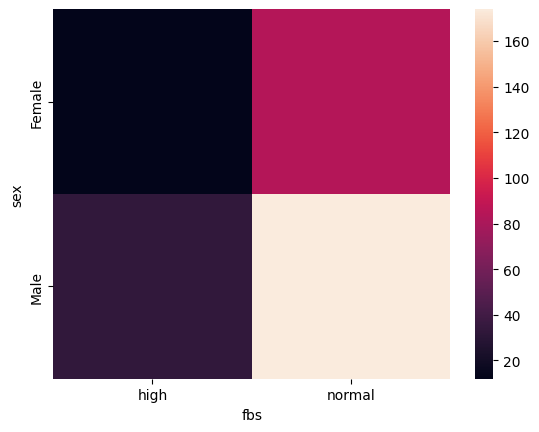

In [19]:
sns.heatmap(ctab1)

In [20]:
# seperate x and y 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,high,normal,150,no,2.3,0,0,fixed deffect,1
1,37,Male,non anginal pain,130,250,normal,S-T abnormanilty,187,no,3.5,0,0,reversible deffect,1
2,41,Female,atypical angina,130,204,normal,normal,172,no,1.4,2,0,reversible deffect,1
3,56,Male,atypical angina,120,236,normal,S-T abnormanilty,178,no,0.8,2,0,reversible deffect,1
4,57,Female,typical angina,120,354,normal,S-T abnormanilty,163,yes,0.6,2,0,reversible deffect,1


In [21]:
x=df.drop(columns="target")
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,Male,asymptomatic,145,233,high,normal,150,no,2.3,0,0,fixed deffect
1,37,Male,non anginal pain,130,250,normal,S-T abnormanilty,187,no,3.5,0,0,reversible deffect
2,41,Female,atypical angina,130,204,normal,normal,172,no,1.4,2,0,reversible deffect
3,56,Male,atypical angina,120,236,normal,S-T abnormanilty,178,no,0.8,2,0,reversible deffect
4,57,Female,typical angina,120,354,normal,S-T abnormanilty,163,yes,0.6,2,0,reversible deffect


In [22]:
y=df[["target"]]
y.head()

,target
0,1
1,1
2,1
3,1
4,1


seperate categorical and continous from x

In [27]:
cat=list(x.columns[x.dtypes=="object"])
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [28]:
con=list(x.columns[x.dtypes!="object"])
con

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

create preprocessing  pipeline 

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder


In [37]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="mean")),
                         ('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                         ('ohe',OneHotEncoder(handle_unknown="ignore"))])
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)])

In [38]:
x_pre=pre.fit_transform(x)

In [40]:
x_pre[:5]

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806,
        -2.27457861, -0.71442887,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273,
        -2.27457861, -0.71442887,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206,
         0.97635214, -0.71442887,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
  

In [41]:
cols=pre.get_feature_names_out()
cols

array(['num__age', 'num__trestbps', 'num__chol', 'num__thalach',
       'num__oldpeak', 'num__slope', 'num__ca', 'cat__sex_Female',
       'cat__sex_Male', 'cat__cp_asymptomatic', 'cat__cp_atypical angina',
       'cat__cp_non anginal pain', 'cat__cp_typical angina',
       'cat__fbs_high', 'cat__fbs_normal', 'cat__restecg_2',
       'cat__restecg_S-T abnormanilty', 'cat__restecg_normal',
       'cat__exang_no', 'cat__exang_yes', 'cat__thal_deffect-3',
       'cat__thal_fixed deffect', 'cat__thal_normal',
       'cat__thal_reversible deffect'], dtype=object)

In [42]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,num__age,num__trestbps,num__chol,num__thalach,num__oldpeak,num__slope,num__ca,cat__sex_Female,cat__sex_Male,cat__cp_asymptomatic,...,cat__fbs_normal,cat__restecg_2,cat__restecg_S-T abnormanilty,cat__restecg_normal,cat__exang_no,cat__exang_yes,cat__thal_deffect-3,cat__thal_fixed deffect,cat__thal_normal,cat__thal_reversible deffect
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-2.274579,-0.714429,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-2.274579,-0.714429,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0.976352,-0.714429,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.976352,-0.714429,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0.976352,-0.714429,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [79]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [80]:
cls=DecisionTreeClassifier()
sel = SequentialFeatureSelector(cls, direction='backward')
sel_features = sel.fit_transform(x_pre, y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__age', 'num__trestbps', 'num__slope', 'num__ca',
       'cat__sex_Male', 'cat__cp_asymptomatic', 'cat__cp_typical angina',
       'cat__restecg_S-T abnormanilty', 'cat__restecg_normal',
       'cat__exang_yes', 'cat__thal_deffect-3', 'cat__thal_normal'],
      dtype=object)

In [81]:
imp_cols = []
for i in sel_cols:
    col = i.split('__')[1]
    imp_cols.append(col)
imp_cols

['age',
 'trestbps',
 'slope',
 'ca',
 'sex_Male',
 'cp_asymptomatic',
 'cp_typical angina',
 'restecg_S-T abnormanilty',
 'restecg_normal',
 'exang_yes',
 'thal_deffect-3',
 'thal_normal']

In [87]:
x_pre[imp_cols]

KeyError: "None of [Index(['age', 'trestbps', 'slope', 'ca', 'sex_Male', 'cp_asymptomatic',\n       'cp_typical angina', 'restecg_S-T abnormanilty', 'restecg_normal',\n       'exang_yes', 'thal_deffect-3', 'thal_normal'],\n      dtype='object')] are in the [columns]"

Splitting the dataset

In [43]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre,y,test_size=0.2)

creating a decision tree model

In [44]:
from sklearn.tree import DecisionTreeClassifier


In [49]:
cls=DecisionTreeClassifier(max_depth=1,min_samples_split=5,min_samples_leaf=3, criterion='entropy')
cls.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

In [50]:
cls.score(x_train,y_train)

0.7768595041322314

In [51]:
cls.score(x_test,y_test)

0.6885245901639344

Hyperparameter Tuning

In [67]:
params={
    "max_depth":[8,9,10,10],
    "min_samples_split":[8,9,10,11,12,13,14,15,16,17,18],
    "criterion":["gini","entropy"]
}

In [68]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 10],
                         'min_samples_split': [8, 9, 10, 11, 12, 13, 14, 15, 16,
                                               17, 18]},
             scoring='f1_macro')

In [69]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 18}

In [70]:
gscv.best_score_

0.7848307737459047

In [71]:
best_dtc=gscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=18)

In [72]:
best_dtc.score(x_train,y_train)

0.9132231404958677

In [73]:
best_dtc.score(x_test,y_test)

0.7049180327868853